# OASIS INFO BYTE (Internship) - DATA SCIENCE - TASK 5 --------> by NIDHIARASU 

In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

#Loading the data set
data = pd.read_csv(r"C:\Users\rajin\OneDrive\Desktop\Internships\Oasis - Data Science\Task 5 - Sales Prediction\Advertising.csv")
print(data.head())
print(data.info())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [2]:
#Range of data
print (data.describe())

#Checking for missing values
print("\n",data.isnull().sum())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


VISUALIZATION OF GIVEN DATA

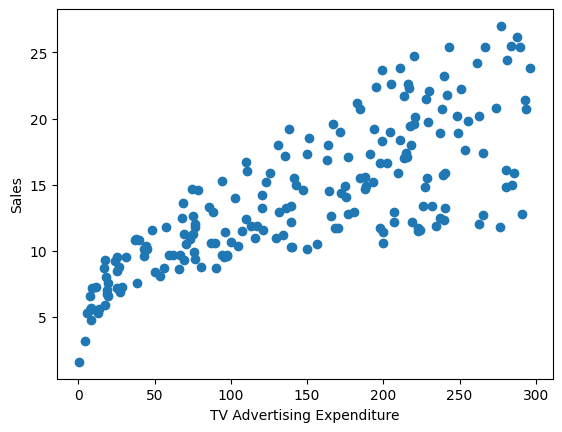

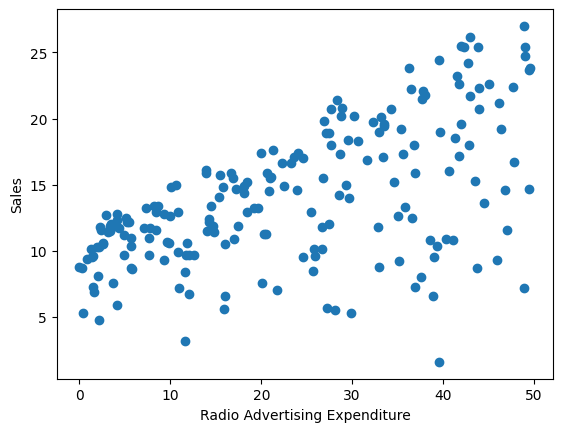

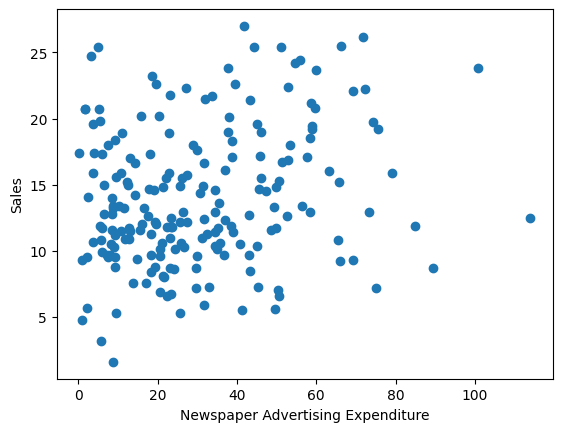

In [5]:
#TV Expenditure
plt.scatter(data['TV'],data['Sales'])
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

#Radio Expenditure
plt.scatter(data['Radio'],data['Sales'])
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

#Newspaper Expenditure
plt.scatter(data['Newspaper'],data['Sales'])
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

TV - Strong Upward Trend / Radio - Moderate / Newspaper - Highly Scattered trend

In [6]:
#Checking Correlation
print(data.corr())

            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


DATA PREPARATION & TRAIN - TEST SPLIT

In [7]:
x = data[['TV','Radio','Newspaper']]
y = data[['Sales']]

#Train-Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160, 1)
(40, 3)
(40, 1)


MODEL TRAINING

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

#Intercept
print(model.intercept_)

#Co-efficient
print("\n",model.coef_)

[2.97906734]

 [[0.04472952 0.18919505 0.00276111]]


MODEL EVALUATION

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_prediction = model.predict(x_test)

mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("Mean Absolute Error (MAE) : ",mae)
print("\nMean Squared Error (MSE) : ",mse)
print("\nR2 Score : ",r2)

Mean Absolute Error (MAE) :  1.4607567168117603

Mean Squared Error (MSE) :  3.1740973539761033

R2 Score :  0.899438024100912


MODEL VISUALIZATION

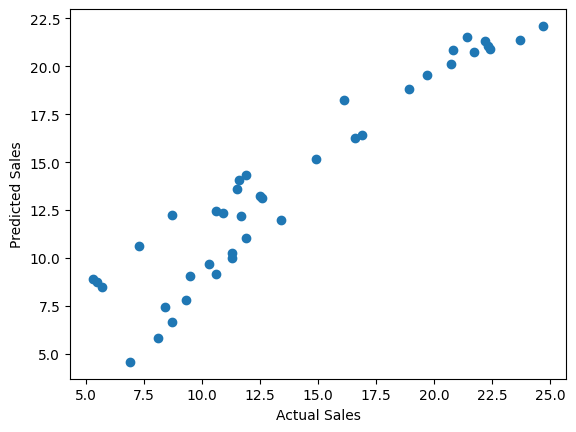

In [10]:
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

PREDICTING FOR CUSTOM VALUES

In [13]:
custom = pd.DataFrame({
    'TV':[20],
    'Radio':[00],
    'Newspaper':[40]
})
custom_prediction = model.predict(custom)
print("Predicted Sales : ",custom_prediction)

Predicted Sales :  [[3.98410226]]


THANK YOU .....